Following the instructions from https://pypi.org/project/python-steam-api/. I got my Steam API key from https://pypi.org/project/python-steam-api/ and pasted it into a text file.

In [1]:
from steam import Steam
from decouple import config

with open("myapikey.txt", "r") as file:
    myapikey=file.read()

import os
os.environ["STEAM_API_KEY"] = myapikey
KEY = config("STEAM_API_KEY")
steam = Steam(KEY)

In [2]:
#loads the previously found valid_ids

with open('raw_data/valid_ids.txt', 'r') as file:
    searchedval=file.read().splitlines()
    
#loads previously searched ids
with open('raw_data/searched_ids.txt', 'r') as file:
    searched=file.read().splitlines()

In [3]:
len(searchedval)

702

In [4]:
len(searched)

10000

In [5]:
searchedval

['76561198078022827',
 '76561198062057850',
 '76561198069717244',
 '76561198079073891',
 '76561198073339847',
 '76561198097426383',
 '76561198089663699',
 '76561198084324477',
 '76561198067051402',
 '76561198062670485',
 '76561198072791933',
 '76561198093741043',
 '76561198087080039',
 '76561198067028836',
 '76561198063916610',
 '76561198086517535',
 '76561198091105414',
 '76561198079598645',
 '76561198066597742',
 '76561198087269064',
 '76561198066051445',
 '76561198083148174',
 '76561198076316444',
 '76561198070894981',
 '76561198097026377',
 '76561198078945019',
 '76561198074339685',
 '76561198090574210',
 '76561198070966169',
 '76561198077538622',
 '76561198074122481',
 '76561198096915145',
 '76561198097274577',
 '76561198093478297',
 '76561198096439217',
 '76561198086755890',
 '76561198082855621',
 '76561198081654074',
 '76561198068901269',
 '76561198094191793',
 '76561198071329284',
 '76561198081396918',
 '76561198097493152',
 '76561198091314212',
 '76561198063496460',
 '76561198

In [6]:
# This cell generates the random User ID's
import random
from time import sleep
import pickle

num_ids=10000  # number of random user ID's to sample

id_set_val = set(searchedval)
id_set_searched = set(searched)
id_set = set()

while len(id_set) < num_ids:
    temp = str(76561198000000000 + random.randint(6e7, 10e7))
    
    # Check that user ID has not already been used before writing to a set
    if temp not in (id_set | id_set_val | id_set_searched):
        id_set.add(temp)
            
id_list = list(id_set)

In [7]:
# This cell iterates over the random user ID's, queries the api, and periodically
# writes output to a file. 

valid_data = []
valid_ids = []
file_num = 0  # tracks number of files outputted so far.
users_in_file = 100  # number of user's data for each file

for j in range(len(id_list)):
    # Pull owned games from the api
    temp = steam.users.get_owned_games(id_list[j])
    
    # assuming output is nonempty, write to the "valid_data" list
    if len(temp) != 0:
        valid_data.append([id_list[j], temp])
        valid_ids.append(id_list[j])
    if (j % int(num_ids/100)) == 0:
        print('progress: {:.2f}%'.format(100*j/num_ids))
    sleep(0.1)
    
    # Periodically write to a file, in case of crashes, etc.
    if len(valid_data) == users_in_file:
        with open('./raw_data/game_data_{}.pkl'.format(file_num), 'wb') as fp:
            pickle.dump(valid_data, fp)
        valid_data = []
        file_num+=1

# Write leftover data to a last file
with open('./raw_data/game_data_{}.pkl'.format(file_num), 'wb') as fp:
    pickle.dump(valid_data, fp)
 
# write valid ids to a text file
with open('raw_data/valid_ids.txt', 'a') as file:
    for id in valid_ids:
        file.write(id+"\n")
        
#write searched ids to a text file
with open('raw_data/searched_ids.txt', 'a') as file:
    for id in id_list:
        file.write(id+"\n")
        
# with open('valid_ids.pkl', 'wb') as fp:
#    pickle.dump(valid_ids, fp)

progress: 0.00%
progress: 1.00%
progress: 2.00%
progress: 3.00%
progress: 4.00%
progress: 5.00%
progress: 6.00%
progress: 7.00%
progress: 8.00%
progress: 9.00%
progress: 10.00%
progress: 11.00%
progress: 12.00%
progress: 13.00%
progress: 14.00%
progress: 15.00%
progress: 16.00%
progress: 17.00%
progress: 18.00%
progress: 19.00%
progress: 20.00%
progress: 21.00%
progress: 22.00%
progress: 23.00%
progress: 24.00%
progress: 25.00%
progress: 26.00%
progress: 27.00%
progress: 28.00%
progress: 29.00%
progress: 30.00%
progress: 31.00%
progress: 32.00%
progress: 33.00%
progress: 34.00%
progress: 35.00%
progress: 36.00%
progress: 37.00%
progress: 38.00%
progress: 39.00%
progress: 40.00%
progress: 41.00%
progress: 42.00%
progress: 43.00%
progress: 44.00%
progress: 45.00%
progress: 46.00%
progress: 47.00%
progress: 48.00%
progress: 49.00%
progress: 50.00%
progress: 51.00%
progress: 52.00%
progress: 53.00%
progress: 54.00%
progress: 55.00%
progress: 56.00%
progress: 57.00%
progress: 58.00%
progres

In [8]:
len(valid_ids)

667

In [14]:
# write valid ids to a text file
with open('raw_data/searched_ids.txt', 'a') as file:
    for id in id_list:
        file.write(id+"\n")

In [10]:
# This is the syntax to load the data from the pkl files. 
# loaded_data will be the name of the python list with the data from the file.
with open ('./raw_data/game_data_0.pkl', 'rb') as fp:
    loaded_data = pickle.load(fp)
loaded_data

[]

In [6]:
len(loaded_data)

41

In [ ]:
testuser="steamusername"
steam.users.search_user(testuser)

In [20]:
testid=steam.users.search_user(testuser)['player']['steamid']
testid

NameError: name 'testuser' is not defined

In [21]:
testfl=steam.users.get_user_friends_list(testid)
testfl

{'friends': [{'steamid': '76561198070180513',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'wislo',
   'profileurl': 'https://steamcommunity.com/id/wislo/',
   'avatar': 'https://avatars.akamai.steamstatic.com/f1cac5451b151a1e6ef4608c776ea7c56598a3d3.jpg',
   'avatarmedium': 'https://avatars.akamai.steamstatic.com/f1cac5451b151a1e6ef4608c776ea7c56598a3d3_medium.jpg',
   'avatarfull': 'https://avatars.akamai.steamstatic.com/f1cac5451b151a1e6ef4608c776ea7c56598a3d3_full.jpg',
   'avatarhash': 'f1cac5451b151a1e6ef4608c776ea7c56598a3d3',
   'lastlogoff': 1674879093,
   'personastate': 0,
   'realname': 'Alex Wilson',
   'primaryclanid': '103582791429521408',
   'timecreated': 1345955730,
   'personastateflags': 0,
   'loccountrycode': 'US',
   'relationship': 'friend',
   'friend_since': 1511538180},
  {'steamid': '76561198060492243',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Sload Extracts Toll From Passing',
   'profileurl': '

In [5]:
testflids=[]

for i in range(len(testfl['friends'])):
    testflids.append(testfl['friends'][i]['steamid'])
    
testflids

#yeah there's probably a way to do it with list comprehension

['76561198024952241',
 '76561198063841652',
 '76561198167166225',
 '76561198089121952',
 '76561198009190429',
 '76561198044477096',
 '76561198018947486',
 '76561198052932070',
 '76561197993353177',
 '76561198015023147',
 '76561198007701968',
 '76561198050495521',
 '76561198007395908',
 '76561198055623603',
 '76561198041103618',
 '76561197996430741',
 '76561197995248893',
 '76561198284261819',
 '76561198052390135',
 '76561198014795926',
 '76561198025017304',
 '76561198076172962',
 '76561198048895718',
 '76561198010127100',
 '76561198074139361',
 '76561198042351806']

In [6]:
testgamelist=steam.users.get_user_recently_played_games(testid)
#for the full list should use steam.users.get_owned_games(testid)

testgamelist

{'total_count': 3,
 'games': [{'appid': 524220,
   'name': 'NieR:Automata™',
   'playtime_2weeks': 73,
   'playtime_forever': 769,
   'img_icon_url': 'ec431ecb2a5178c5a01bb15550f112f93af029bb',
   'playtime_windows_forever': 769,
   'playtime_mac_forever': 0,
   'playtime_linux_forever': 0},
  {'appid': 1794680,
   'name': 'Vampire Survivors',
   'playtime_2weeks': 33,
   'playtime_forever': 819,
   'img_icon_url': 'b09d9a388f5328ec977f7b45228ac8ae21a78c55',
   'playtime_windows_forever': 819,
   'playtime_mac_forever': 0,
   'playtime_linux_forever': 0},
  {'appid': 39210,
   'name': 'FINAL FANTASY XIV Online',
   'playtime_2weeks': 1,
   'playtime_forever': 75090,
   'img_icon_url': '98527a5229540d86ced171d8a5dff2f8a560fe80',
   'playtime_windows_forever': 71940,
   'playtime_mac_forever': 0,
   'playtime_linux_forever': 0}]}

In [7]:
hoursplayed=[]

for i in range(testgamelist['total_count']):
    hoursplayed.append(testgamelist['games'][i]['playtime_2weeks'])
    
hoursplayed

[73, 33, 1]

In [8]:
for friend in testflids:
    testgamelist2=steam.users.get_user_recently_played_games(friend)
    if testgamelist2=={}: #these users might not have been on recently?
        continue
    if testgamelist2['total_count']>0:
        for i in range(testgamelist2['total_count']):
            hoursplayed.append(testgamelist2['games'][i]['playtime_2weeks'])
        
hoursplayed

[73,
 33,
 1,
 2214,
 68,
 22,
 2501,
 1540,
 82,
 61,
 904,
 411,
 109,
 29,
 256,
 209,
 63,
 40,
 16,
 679,
 10,
 1871,
 1086,
 77,
 8818,
 1220,
 955,
 232,
 668,
 497,
 37,
 3062,
 1292,
 474,
 1,
 7,
 405,
 360,
 359,
 12,
 3861,
 128,
 37,
 1,
 627,
 2754,
 1071,
 6,
 1229,
 473,
 390,
 154,
 61,
 13,
 2339]

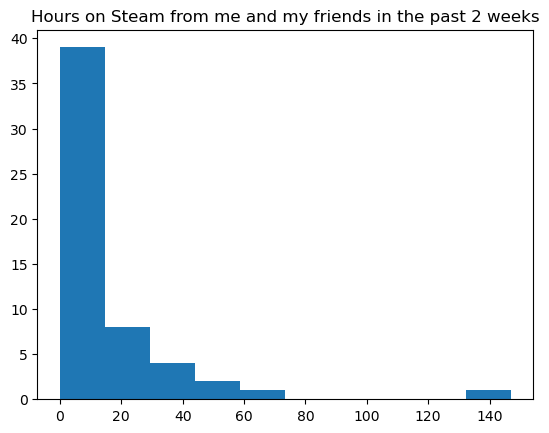

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.hist(np.asarray(hoursplayed)/60)
plt.title('Hours on Steam from me and my friends in the past 2 weeks')
plt.show()

In [ ]:
teststeamlib=steam.users.get_owned_games(testid)

teststeamlib

In [11]:
steam.apps.get_app_details(teststeamlib['games'][0]['appid'])
# oof does this return one long string?

'{"70": {"success": true, "data": {"type": "game", "name": "Half-Life", "steam_appid": 70, "required_age": 0, "is_free": false, "dlc": [323130], "detailed_description": "Named Game of the Year by over 50 publications, Valve\'s debut title blends action and adventure with award-winning technology to create a frighteningly realistic world where players must think to survive. Also includes an exciting multiplayer mode that allows you to play against friends and enemies around the world.", "about_the_game": "Named Game of the Year by over 50 publications, Valve\'s debut title blends action and adventure with award-winning technology to create a frighteningly realistic world where players must think to survive. Also includes an exciting multiplayer mode that allows you to play against friends and enemies around the world.", "short_description": "Named Game of the Year by over 50 publications, Valve\'s debut title blends action and adventure with award-winning technology to create a frighten

Functions that I can't get to work:

In [ ]:
steam.apps.get_user_stats("<steam_id>", "<app_id>")